In [4]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
import seaborn as sns

In [5]:
# Import dataset
df = pd.read_csv('diabetes.csv')
df.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


# Data Overview

In [6]:
print(f'Shape of data set:\n\n {df.shape} \n')
print('----'*10)
print(f'Values: \n\n {df.values} \n')
print('----'*10)
print(f'Columns: \n\n{df.columns}\n')
print('----'*10)
print('Short data analyse: \n')
df.describe()

Shape of data set:

 (768, 9) 

----------------------------------------
Values: 

 [[  6.    148.     72.    ...   0.627  50.      1.   ]
 [  1.     85.     66.    ...   0.351  31.      0.   ]
 [  8.    183.     64.    ...   0.672  32.      1.   ]
 ...
 [  5.    121.     72.    ...   0.245  30.      0.   ]
 [  1.    126.     60.    ...   0.349  47.      1.   ]
 [  1.     93.     70.    ...   0.315  23.      0.   ]] 

----------------------------------------
Columns: 

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

----------------------------------------
Short data analyse: 



,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [8]:
#Let see how many peoples from data set has diabetes
print('Total number of people in the training data...', len(df))
print('Number of people in the training data who has diabetes...', len(df[df['Outcome'] == 1]))

Total number of people in the training data... 768
Number of people in the training data who has diabetes... 268


In [9]:
# Defining function to identify missing value from all features
def missing_values (dataset):
    total = df.isnull().sum().sort_values(ascending = False)
    percent = ((df.isnull().sum()/df.isnull().count()*100).sort_values(ascending = False))
    missing_values= pd.concat([total,percent], axis=1, keys= ['Total', 'Percent'])
    return missing_values
print('Missing Values from Diabetes data set')
print()
print (missing_values (df))

Missing Values from Diabetes data set

                          Total  Percent
Outcome                       0      0.0
Age                           0      0.0
DiabetesPedigreeFunction      0      0.0
BMI                           0      0.0
Insulin                       0      0.0
SkinThickness                 0      0.0
BloodPressure                 0      0.0
Glucose                       0      0.0
Pregnancies                   0      0.0


In [10]:
# Defining funcion to identify all numeric data
def numeric(data):
    numeric_cols = data.select_dtypes(np.number).columns.tolist()
    return data[numeric_cols].head(3)
print('Numeric features of data set are:')
print()
numeric_df= numeric(df)
print(numeric_df)

Numeric features of data set are:

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  


In [11]:
# Defining funcion to identify all categorical data
def categoric(data):
    categoric_cols = data.select_dtypes(exclude=np.number).columns.tolist()
    return data[categoric_cols].head(3)
print('Categoric features of data set are:')
print()
categoric_df= categoric(df)
print(categoric_df)

Categoric features of data set are:

Empty DataFrame
Columns: []
Index: [0, 1, 2]


(9.5, -0.5)

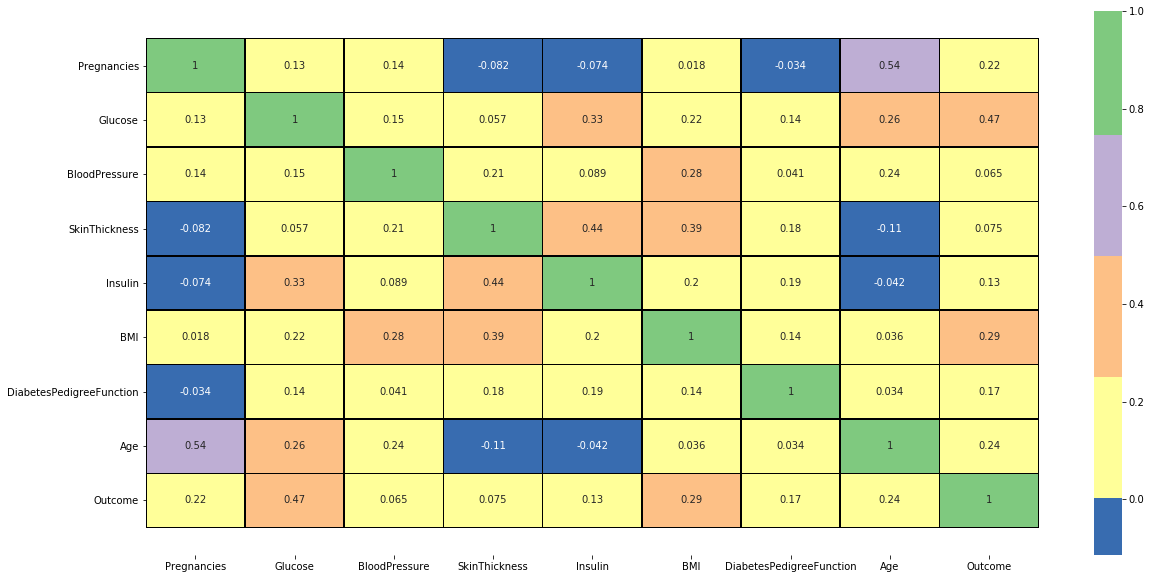

In [12]:
# Correlation 
plt.figure(figsize=(20,10))
ax = sns.heatmap(df.corr(), annot=True, cmap='Accent_r',annot_kws={'size': 10},
                linecolor='black', center=False,  linewidths=.5)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5) 

In [13]:
# Exploring outcome by Age
print('% people under the age of 30 who have diabetes', 100*np.mean(df['Outcome'][df['Age'] < 30]))
print('% people over the age of 30 who have diabetes', 100*np.mean(df['Outcome'][df['Age'] > 30]))

% people under the age of 30 who have diabetes 21.21212121212121
% people over the age of 30 who have diabetes 50.712250712250714


# Data Visualization

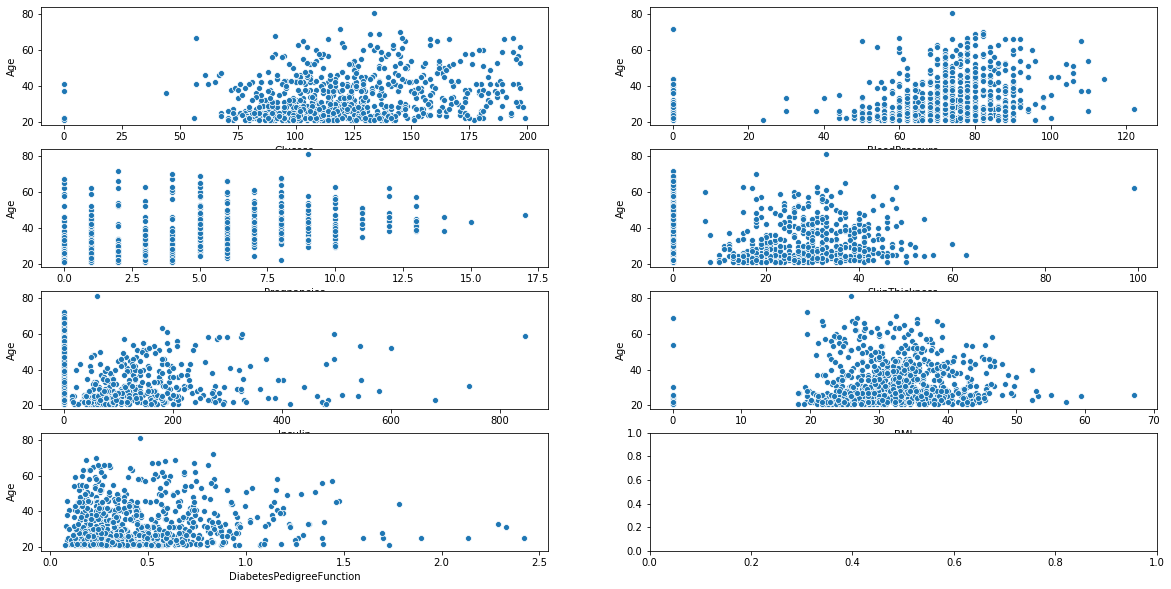

In [18]:
# Let see some visualisation of features

plain_features = [ 'Glucose','BloodPressure','Pregnancies', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction']
fig, ax = plt.subplots(nrows=4, ncols=2, figsize=(20, 10))
start = 0
for j in range(4):
    for i in range(2):
        if start == len(plain_features):
            break
        sns.scatterplot(x=plain_features[start],
                    y='Age', data=df, ax=ax[j, i])
        start += 1

            

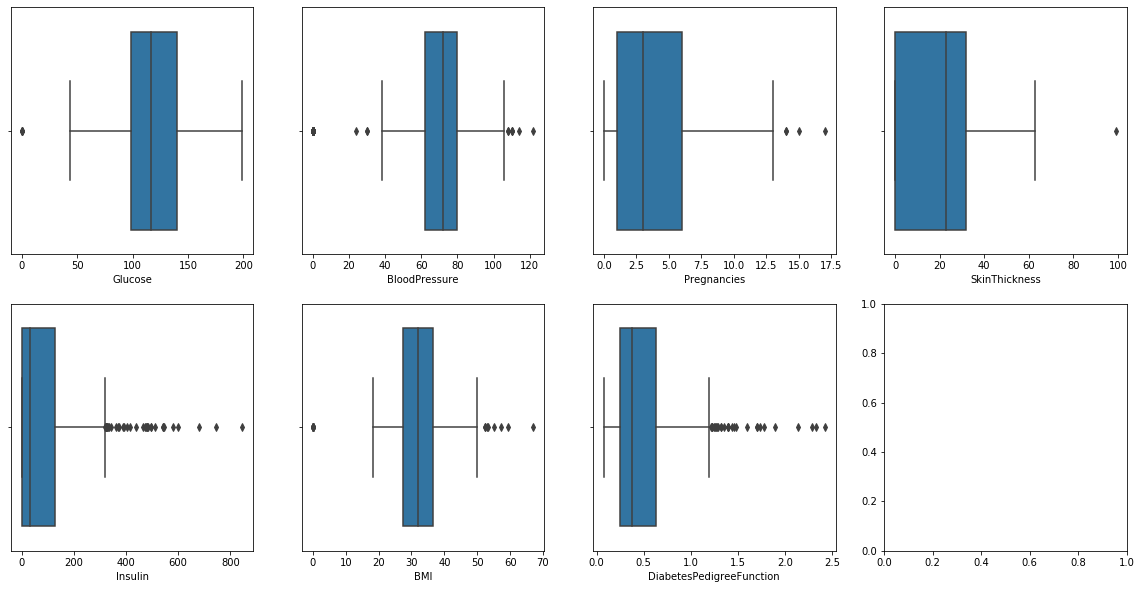

In [15]:
# Let see some visualisation of features

plain_features = [ 'Glucose','BloodPressure','Pregnancies', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction']
fig, ax = plt.subplots(nrows=2, ncols=4, figsize=(20, 10))
start = 0
for j in range(2):
    for i in range(4):
        if start == len(plain_features):
            break
        sns.boxplot(x=plain_features[start], data=df, ax=ax[j, i])
        start += 1


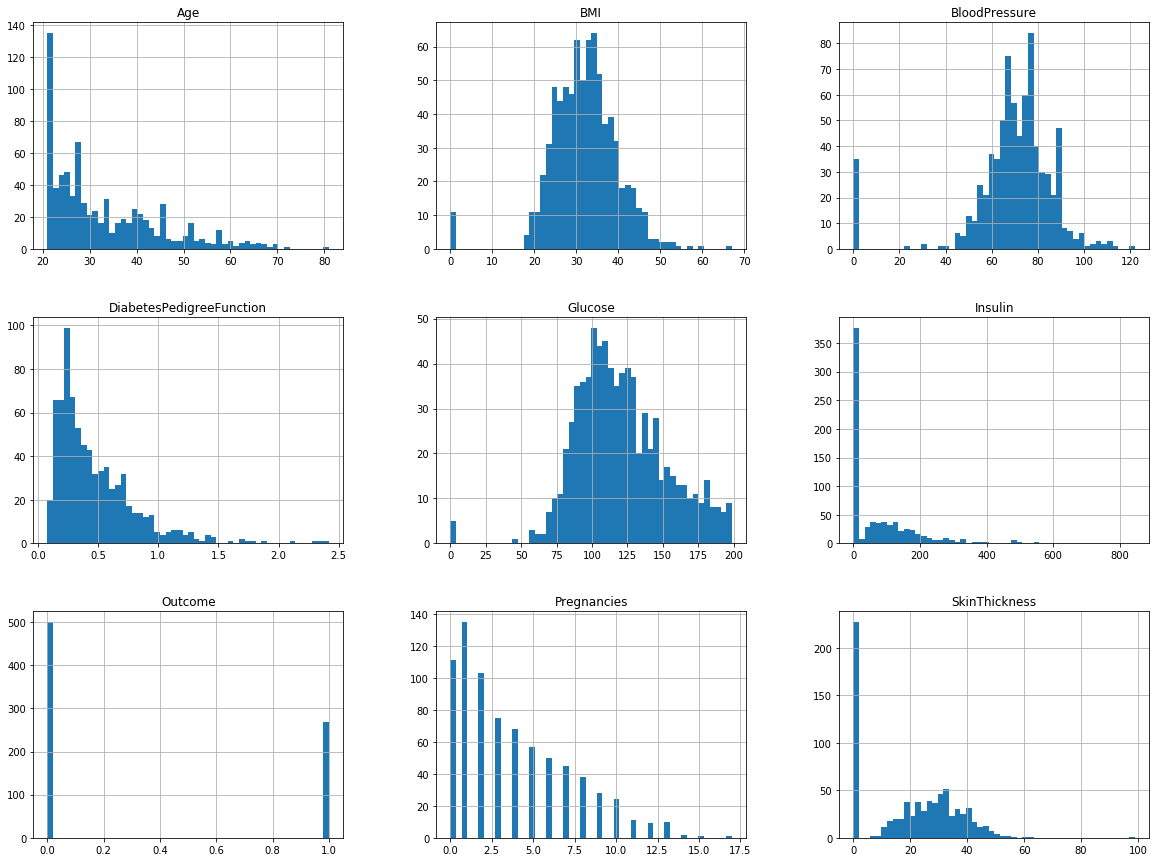

In [16]:
# Let's plot some histograms to have a previzualisation of some of the data
df.hist(bins=50, figsize=(20,15))
plt.show()

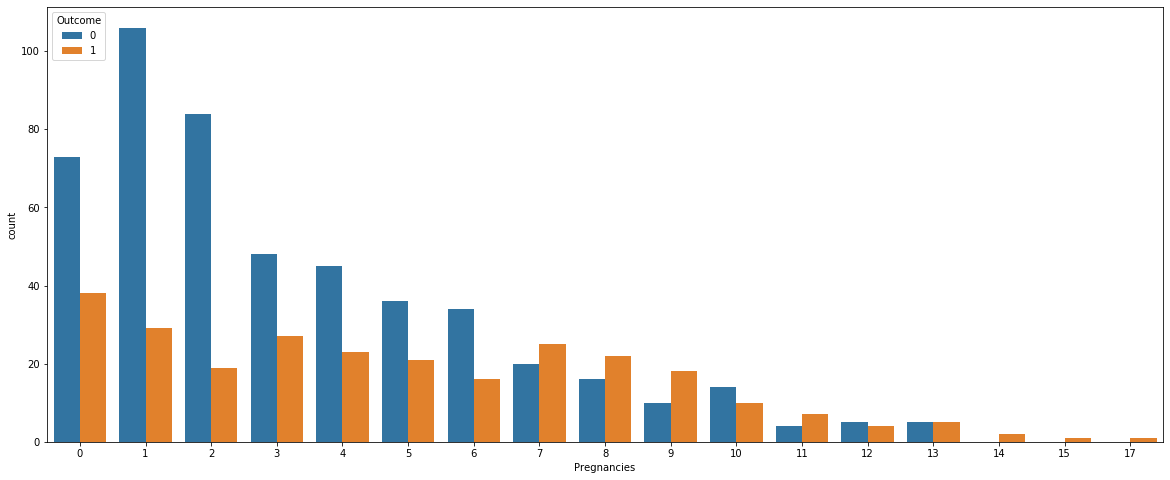

In [17]:
plt.figure(figsize=(20,8))
sns.countplot(x = 'Pregnancies', data = df, hue = 'Outcome')

In [14]:
# Compare Outcome rate across Age, Pregnancies, BloodPressure, and SkinThickness 
pd.pivot_table(df, index = 'Outcome', values = ['Age','Pregnancies','BloodPressure','SkinThickness'])

,Age,BloodPressure,Pregnancies,SkinThickness
Outcome,,,,
0,31.190000,68.184000,3.298000,19.664000
1,37.067164,70.824627,4.865672,22.164179


In [15]:
# Assining X and y variables
X = df.drop(['Outcome'], axis = 1)
y = df['Outcome']
display(X.head(5))
display(y)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

In [16]:
# Split independent and target variable on train and test dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test =  train_test_split(X, y, test_size=0.2, random_state=0)

In [17]:
print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (614, 8)
y_train shape: (614,)
X_test shape: (154, 8)
y_test shape: (154,)


In [18]:
# First we will try to normalize data and than we will observe the distribution of data
from sklearn.preprocessing import MinMaxScaler

# fit scaler on training data
norm = MinMaxScaler()

# transform training data
X_train_norm = norm.fit_transform(X_train)

# transform testing dataabs
X_test_norm = norm.transform(X_test)

In [19]:
# Distribution of normalized data train data
col_names = list(X.columns)
df_norm = pd.DataFrame(data = X_train_norm, columns = col_names)
df_norm.head(3)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.411765,0.757576,0.639344,0.292929,0.148936,0.524590,0.262169,0.550000
1,0.235294,0.489899,0.491803,0.232323,0.000000,0.420268,0.155850,0.016667
2,0.000000,0.833333,0.737705,0.333333,0.803783,0.779434,0.149018,0.033333


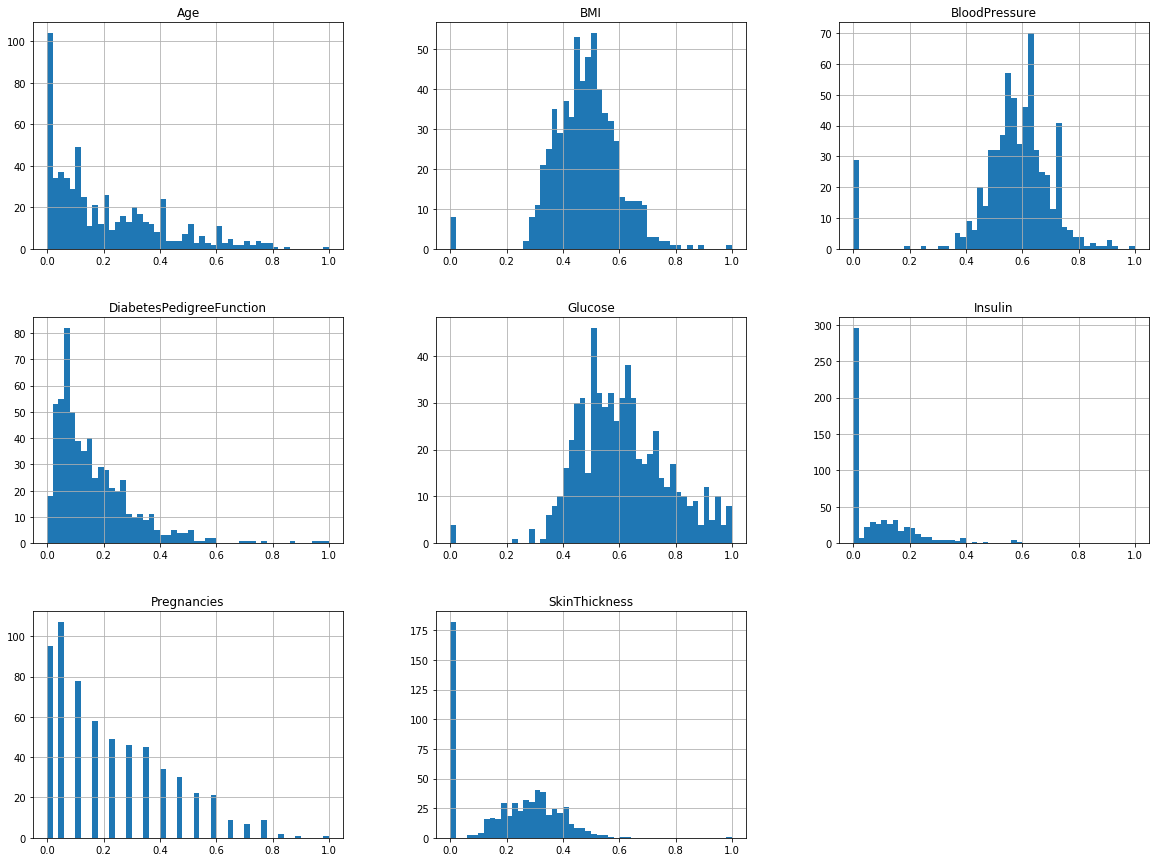

In [20]:
# Visualize normalized data
df_norm.hist(bins=50, figsize=(20,15))
plt.show()

In [21]:
# Second we will try to standardize data and than we will observe the distribution of data
from sklearn.preprocessing import StandardScaler

stdsc = StandardScaler()
X_train_std = stdsc.fit_transform(X_train)
X_test_std = stdsc.transform(X_test)

In [22]:
# Dist of standardized data
df_std = pd.DataFrame(data = X_train_std, columns = col_names)
df_std.head(3)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.908329,0.915694,0.449124,0.522226,0.373635,0.378526,0.677404,1.699558
1,0.036447,-0.751822,-0.472301,0.148149,-0.699657,-0.506672,-0.070497,-0.965692
2,-1.126063,1.387632,1.063407,0.771611,5.092711,2.540941,-0.118555,-0.882403


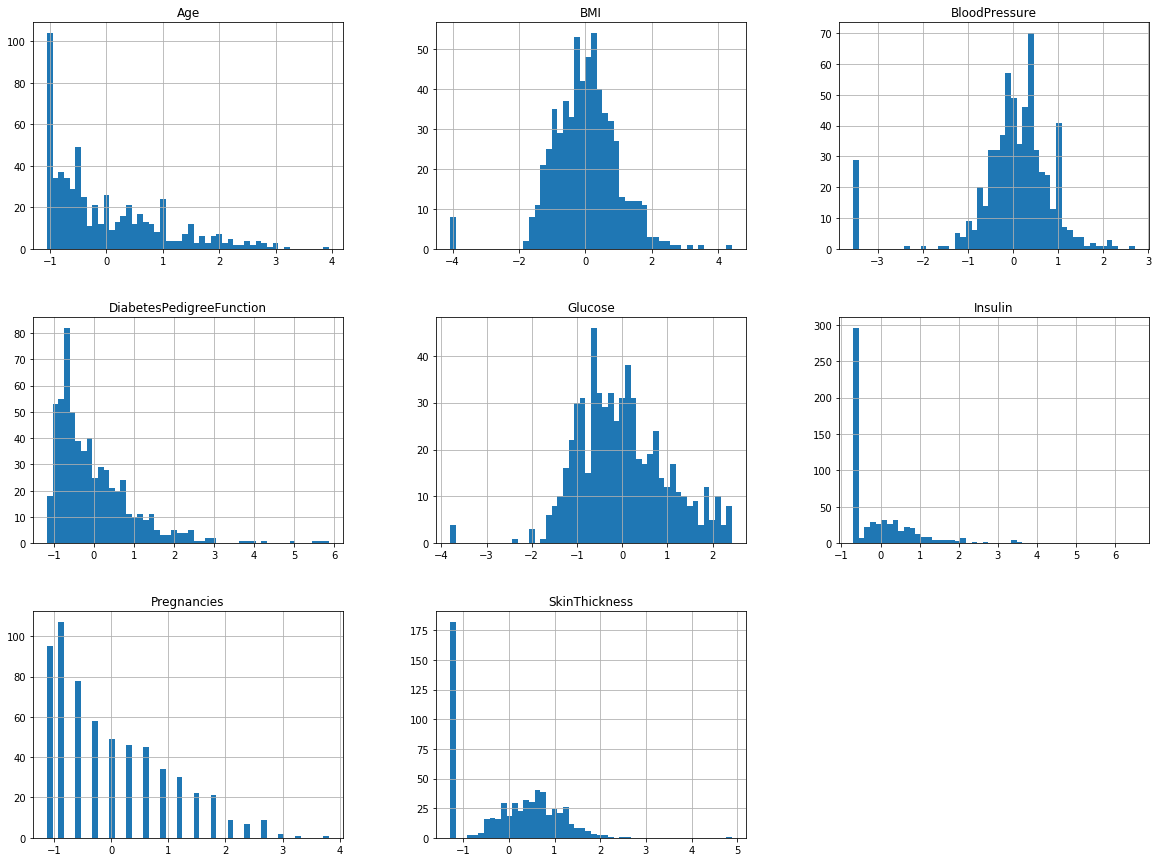

In [23]:
## Visualize standardized data
df_std.hist(bins=50, figsize=(20,15))
plt.show()

In [24]:
# Import scores 
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
acc_scores = {}
ROC={}

In [25]:
# Define function to go through models
def models(model, X_train, y_train, X_test, y_test, model_name):
    reg = model
    reg.fit(X_train, y_train)
    y_pred = reg.predict(X_test)
    acc_scores[model_name] = accuracy_score(y_test, y_pred)
    print(f"Acc_score of {model_name}: {acc_scores[model_name]}\n")
    ROC[model_name]=roc_auc_score(y_test, y_pred)
    print(f"Roc_auc_score: {ROC[model_name]} \n ")
    return model

In [26]:
# First model Svc_linear
from sklearn.svm import SVC, NuSVC, LinearSVC
Svc_linear = SVC(kernel='linear', C=1)
model1 = models(Svc_linear, X_train_std, y_train, X_test_std, y_test, 'Svc_linear')

Acc_score of Svc_linear: 0.8246753246753247

Roc_auc_score: 0.7664545635315172 
 


In [27]:
# Second model SVC_rbf
SVC_rbf = SVC()
model2 = models(SVC_rbf, X_train_std, y_train, X_test_std, y_test, 'SVC_rbf')


Acc_score of SVC_rbf: 0.7922077922077922

Roc_auc_score: 0.7251938755219726 
 


In [28]:
# Third model RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
model3 = models(rf, X_train_std, y_train, X_test_std, y_test, 'Ran_for_clf')


Acc_score of Ran_for_clf: 0.8116883116883117

Roc_auc_score: 0.77500497116723 
 


In [29]:
# Fourth model LogisticRegression
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(random_state=0)
model4 = models(log_reg, X_train_std, y_train, X_test_std, y_test, 'Log_Reg')


Acc_score of Log_Reg: 0.8246753246753247

Roc_auc_score: 0.7664545635315172 
 


Text(0, 0.5, 'Testing Accuracy')

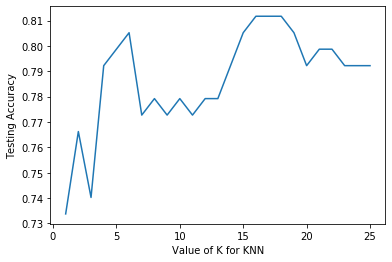

In [30]:
from sklearn.neighbors import KNeighborsClassifier
%matplotlib inline
import matplotlib.pyplot as plt

#import metrics model to check the accuracy 
from sklearn import metrics
#Try running from k=1 through 25 and record testing accuracy
k_range = range(1,26)
scores = {}
scores_list = []
for k in k_range:
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(X_train_std,y_train)
        y_pred=knn.predict(X_test_std)
        scores[k] = metrics.accuracy_score(y_test,y_pred)
        scores_list.append(metrics.accuracy_score(y_test,y_pred))


#plot the relationship between K and the testing accuracy
plt.plot(k_range,scores_list)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')

In [31]:
#5th model KNeighborsClassifier
KNN = KNeighborsClassifier(n_neighbors=k)
model5 = models(KNN, X_train_std, y_train, X_test_std, y_test, 'KNN')


Acc_score of KNN: 0.7922077922077922

Roc_auc_score: 0.7132630741698149 
 


In [32]:
# 6th XGBoost
import xgboost as xgb
xg_class = xgb.XGBClassifier(objective ='reg:logistic', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 10)
model6 = models(xg_class, X_train_std, y_train, X_test_std, y_test, 'xg')


Acc_score of xg: 0.7857142857142857

Roc_auc_score: 0.6966593756213959 
 


In [33]:
# 7th model SGDClassifier
from sklearn.linear_model import SGDClassifier
sgdclass = SGDClassifier(max_iter=1000, tol=1e-3)
model7 = models(sgdclass, X_train_std, y_train, X_test_std, y_test, 'sgdclass')


Acc_score of sgdclass: 0.7272727272727273

Roc_auc_score: 0.6605687015311195 
 


In [34]:
# 8th model DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier
Dec_tree_class = DecisionTreeClassifier(random_state=0)
model8 = models(Dec_tree_class, X_train_std, y_train, X_test_std, y_test, 'Dec_tree_class')


Acc_score of Dec_tree_class: 0.7662337662337663

Roc_auc_score: 0.7363292901173195 
 


In [35]:
# 9th model ExtraTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import ExtraTreeClassifier
extra_tree = ExtraTreeClassifier(random_state=0)
bag_class_extra_tree = BaggingClassifier(extra_tree, random_state=0)
model9 = models(bag_class_extra_tree, X_train_std, y_train, X_test_std, y_test, 'bag_class_extra_tree')


Acc_score of bag_class_extra_tree: 0.8051948051948052

Roc_auc_score: 0.7584012726188109 
 


In [36]:
# 10th model AdaBoostClassifier
from sklearn.ensemble import AdaBoostClassifier
Ada =AdaBoostClassifier()
model10 = models(Ada, X_train_std, y_train, X_test_std, y_test, 'Ada')


Acc_score of Ada: 0.7792207792207793

Roc_auc_score: 0.7456750845098429 
 


In [37]:
# Lets see the results of models
df_results = pd.DataFrame({'Models': list(acc_scores.keys()),
                          'Acc_Scores': list(acc_scores.values())})
df_results

,Models,Acc_Scores
0,Svc_linear,0.824675
1,SVC_rbf,0.792208
2,Ran_for_clf,0.811688
3,Log_Reg,0.824675
4,KNN,0.792208
5,xg,0.785714
6,sgdclass,0.727273
7,Dec_tree_class,0.766234
8,bag_class_extra_tree,0.805195
9,Ada,0.779221


[Text(0, 0.5, 'Acc_Scores')]

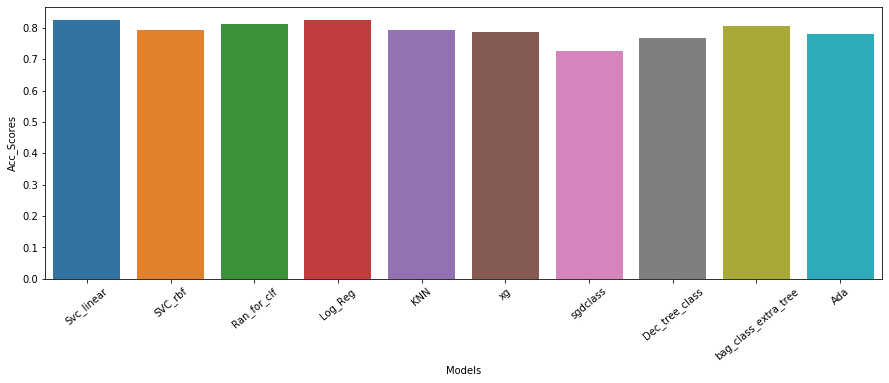

In [38]:
plt.figure(figsize=(15,5))
ax = sns.barplot(x = "Models", y = "Acc_Scores", data = df_results)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40)
ax.set(ylabel = "Acc_Scores")

In [39]:
# Let see which model gives the best result
print(f"The model with best Acc_score is {max(acc_scores, key=acc_scores.get)} and it's Acc_score is {acc_scores[max(acc_scores, key=acc_scores.get)]:.3f}.")

The model with best Acc_score is Svc_linear and it's Acc_score is 0.825.


In [40]:
# Lets plot the results ROC score of models
df_results2 = pd.DataFrame({'Models': list(ROC.keys()),
                          'ROC_scores': list(ROC.values())})
df_results2

,Models,ROC_scores
0,Svc_linear,0.766455
1,SVC_rbf,0.725194
2,Ran_for_clf,0.775005
3,Log_Reg,0.766455
4,KNN,0.713263
5,xg,0.696659
6,sgdclass,0.660569
7,Dec_tree_class,0.736329
8,bag_class_extra_tree,0.758401
9,Ada,0.745675


[Text(0, 0.5, 'ROC_scores')]

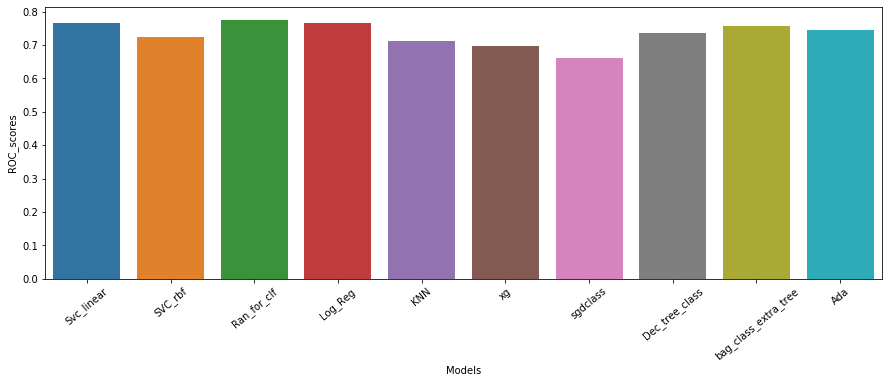

In [41]:
plt.figure(figsize=(15,5))
ax = sns.barplot(x = "Models", y = "ROC_scores", data = df_results2)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40)
ax.set(ylabel = "ROC_scores")

In [46]:
# Let see which model gives the best ROC score
print(f"The model with best roc is {max(ROC, key=ROC.get)} and it's roc is {ROC[max(ROC, key=ROC.get)]:.3f}.")

The model with best roc is Ran_for_clf and it's roc is 0.775.


In [43]:
# At the end let see how good is our prediction
df_check = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df_check.head(5)

,Actual,Predicted
661,1,1
122,0,0
113,0,0
14,1,1
529,0,0


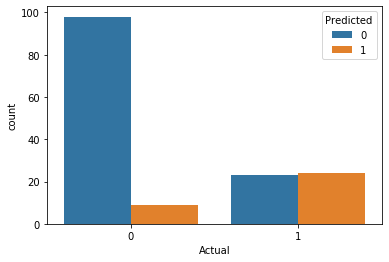

In [44]:
plot = sns.countplot(x = "Actual", hue='Predicted',data = df_check)

# THE END